In [97]:
# Sales Data Analysis Project

# Goal: Identify trends, seasonality, and revenue growth
# Dataset: Superstore sales data

In [98]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# import csv file
df = pd.read_csv(r"C:\Users\shatakshi\OneDrive\Desktop\sample sales analysis project\Sample - Superstore.csv", encoding='ISO-8859-1')



In [100]:
df.shape

(9994, 21)

In [101]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Cleaning

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [103]:
#check for null values
pd.isnull(df).sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [104]:
# remove unnecessary column
df.drop(['Row ID'], axis=1, inplace=True)

In [105]:
#converting in actual date
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [106]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [107]:
# removing duplicate
df.drop_duplicates(inplace=True)

DERIVING NEW COLUMNS

In [108]:
df['Year'] = df['Order Date'].dt.year

In [109]:
df['Month'] = df['Order Date'].dt.to_period('M')

In [110]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

In [111]:
df['Sales Per Unit'] = (df['Sales'] / df['Quantity'])

OVERALL SALES TREND

In [112]:
monthly_sales = df.groupby('Month').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

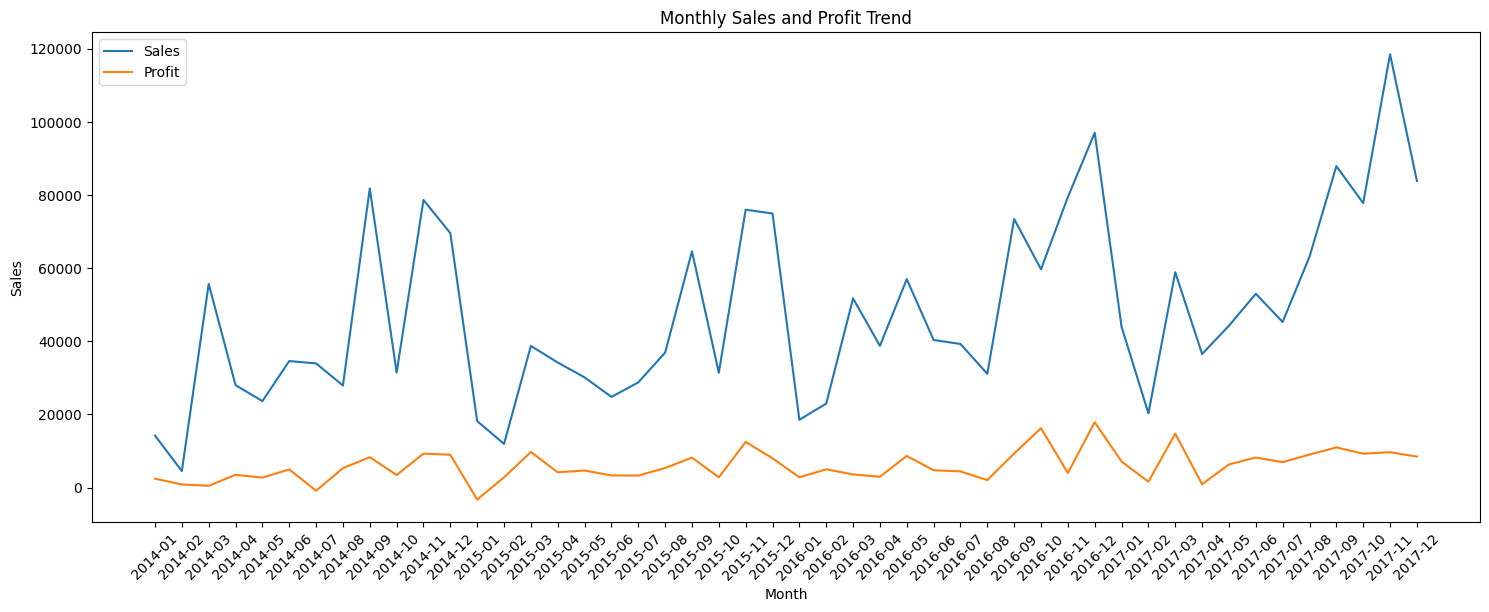

In [113]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, label='Sales')
sns.lineplot(x='Month', y='Profit', data=monthly_sales, label='Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Monthly Sales and Profit Trend')
plt.legend()
plt.show()

CATEGORY WISE ANALYSIS

In [114]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

In [115]:
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

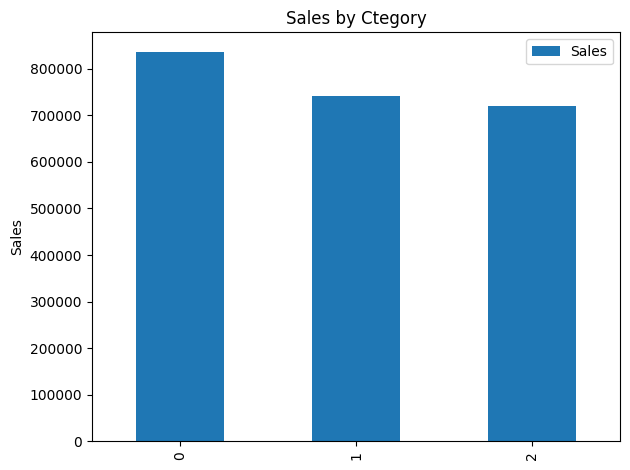

In [116]:
plt.figure(figsize=(10,5))
category_sales.plot(kind='bar', title='Sales by Ctegory')
# sns.barplot(y = 'Sales', data = category_sales)
plt.ylabel('Sales')
plt.tight_layout()
plt.show

<Figure size 1200x500 with 0 Axes>

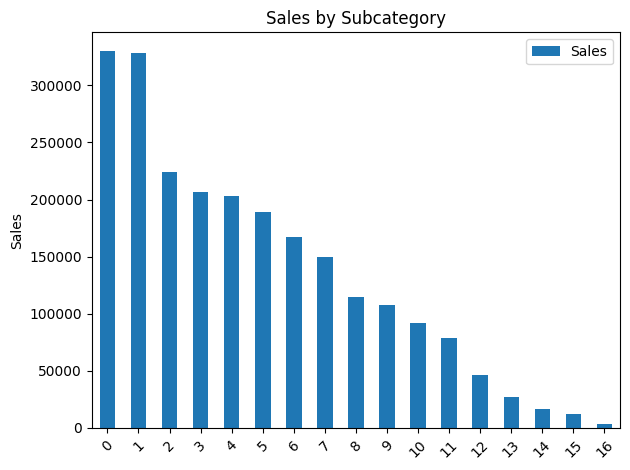

In [117]:
plt.figure(figsize=(12,5))
subcategory_sales.plot(kind='bar', title='Sales by Subcategory')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

REGION WISE SALES

In [118]:
region_sales = df.groupby('Region')['Sales'].sum().sort_index(ascending=False)

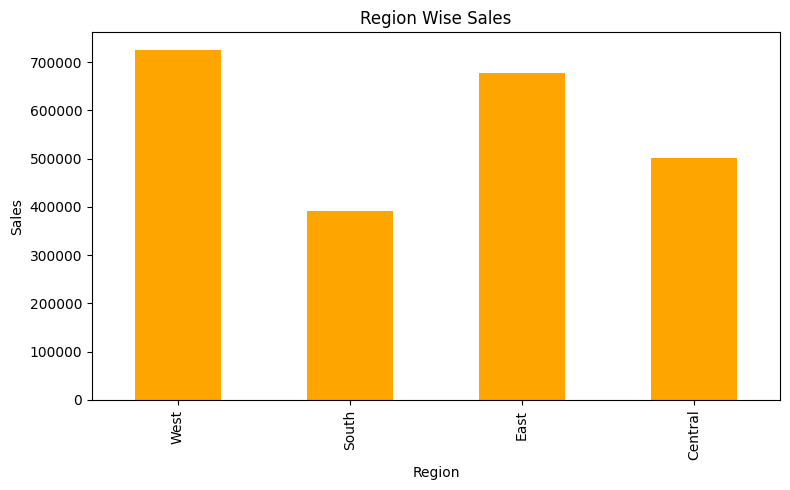

In [119]:
plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='orange', title='Region Wise Sales')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

TOP PRODUCTS AND CUSTOMERS

In [120]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

In [121]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

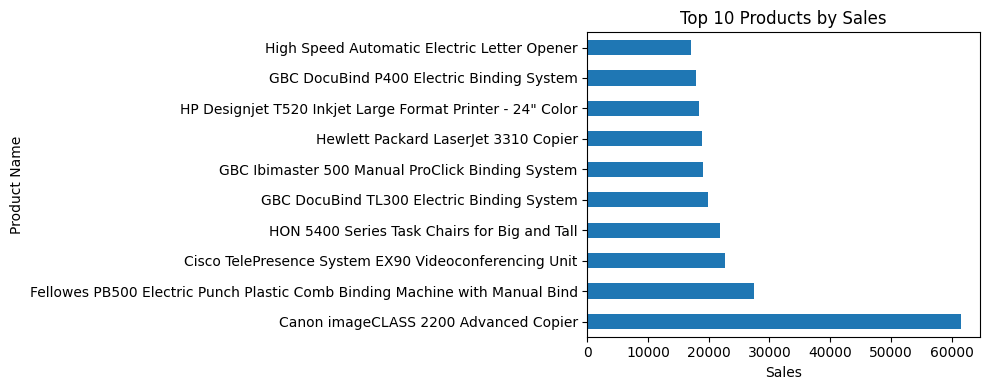

In [122]:
plt.figure(figsize=(10,4))
top_products.plot(kind='barh', title='Top 10 Products by Sales')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

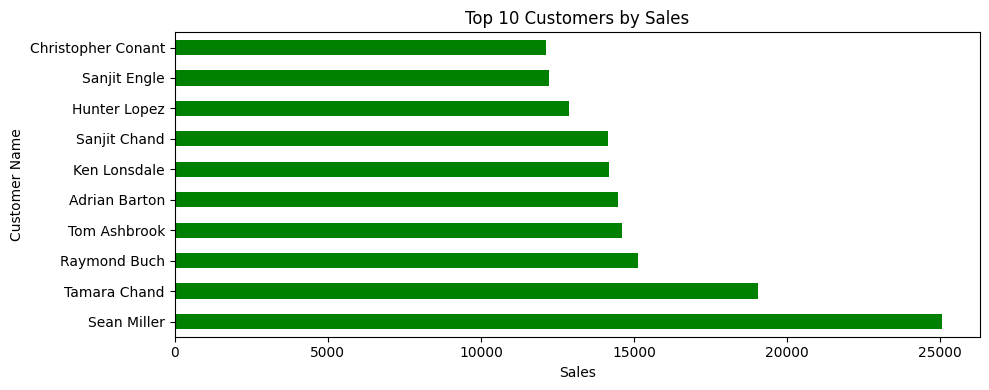

In [123]:
plt.figure(figsize=(10,4))
top_customers.plot(kind='barh', color='green', title='Top 10 Customers by Sales')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

DISCOUNT VS PROFIT

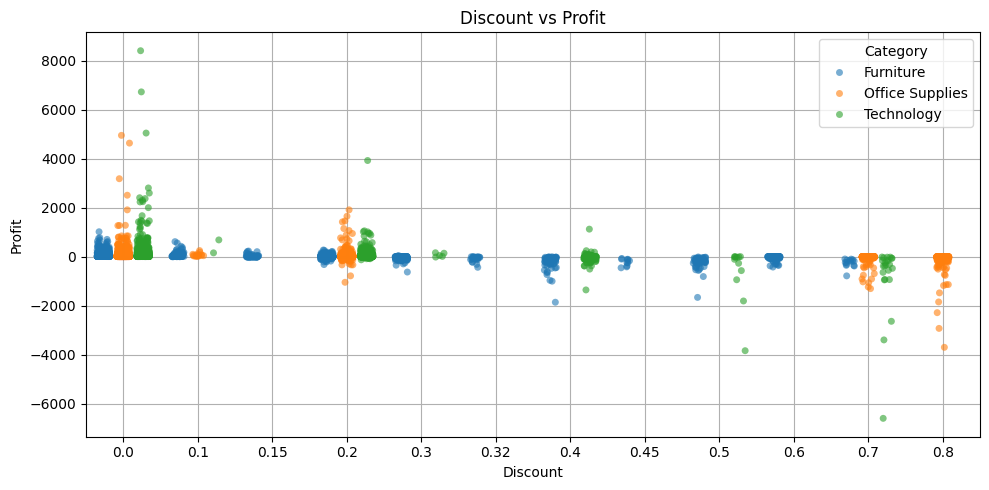

In [124]:
plt.figure(figsize=(10,5))
sns.stripplot(x='Discount', y='Profit', hue='Category', data=df, dodge=True, jitter=0.25, alpha=0.6)
plt.title('Discount vs Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
df.to_csv('Cleaned_Superstore_Sales.csv', index=False)